# Building Linear Regression Model to predict the used car prices

## 1. Data Aquisition

### Importing required packages

In [70]:
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import matplotlib.pyplot as plt

Used car dataset url https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

Importing the csv into the data frame

In [12]:
df = pd.read_csv("imports-85.data",header =None) 

### Imported data frame does not have headers
Assigning the column headers from a seperate file found on the internet at https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names  


In [13]:
headers = ["symboling","normalized-losses",  "make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base",              
"length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",              
"peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

In [23]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### Describing the data set
 Following are the columns of the dataset with the data types

#### Headers

1. symboling:                -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses:        continuous from 65 to 256.
3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz,mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type:                diesel, gas.
5. aspiration:               std, turbo.
6. num-of-doors:             four, two.
7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels:             4wd, fwd, rwd.
9. engine-location:          front, rear.
10. wheel-base:               continuous from 86.6 120.9.
11. length:                   continuous from 141.1 to 208.1.
12. width:                    continuous from 60.3 to 72.3.
13. height:                   continuous from 47.8 to 59.8.
14. curb-weight:              continuous from 1488 to 4066.
15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
17. engine-size:              continuous from 61 to 326.
18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore:                     continuous from 2.54 to 3.94.
20. stroke:                   continuous from 2.07 to 4.17.
21. compression-ratio:        continuous from 7 to 23.
22. horsepower:               continuous from 48 to 288.
23. peak-rpm:                 continuous from 4150 to 6600.
24. city-mpg:                 continuous from 13 to 49.
25. highway-mpg:              continuous from 16 to 54.
26. price:   

In [22]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

The prices having missing values and the data type for price, horsepower, bore is object.

## 2. Data Cleaning and Formatting

Deleting the rows with unknown car prices

In [27]:
df['price'] = df['price'].replace('?',0)
df['price'] = df['price'].astype('float64')
df['price'] = df['price'].replace(0,np.nan)

df.dropna(subset=["price"], axis = 0, inplace = True)

Converting the horsepower into int64

In [31]:
df['horsepower'] = df['horsepower'].replace('?',0)
df['horsepower'] = df['horsepower'].astype('int64')

## 3. Normalizing the Data

In [54]:
df['price'] = df['price']/df['price'].max()

df['horsepower'] = df['horsepower']/df['horsepower'].max()

df['curb-weight'] = df['curb-weight']/df['curb-weight'].max()

df['engine-size'] = df['engine-size']/df['engine-size'].max()

df['highway-mpg'] = df['highway-mpg']/df['highway-mpg'].max()

#### Checking Correlation of 'horsepower','curb-weight','engine-size','highway-mpg' with 'price'

In [72]:
cor = df[['horsepower','curb-weight','engine-size','highway-mpg','price']].corr()
cor

,horsepower,curb-weight,engine-size,highway-mpg,price
horsepower,1.000000,0.732664,0.789844,-0.776948,0.792758
curb-weight,0.732664,1.000000,0.849072,-0.794889,0.834415
engine-size,0.789844,0.849072,1.000000,-0.679571,0.872335
highway-mpg,-0.776948,-0.794889,-0.679571,1.000000,-0.704692
price,0.792758,0.834415,0.872335,-0.704692,1.000000


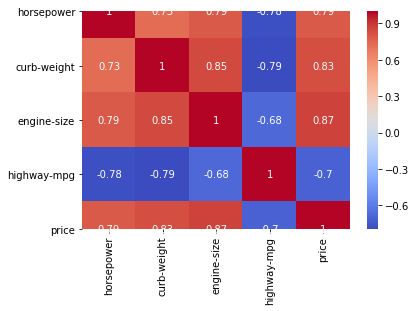

In [83]:
sb.heatmap(cor, annot = True, cmap= 'coolwarm')

There is a strong correlation with price as seen above. We will further check for causation after building the model

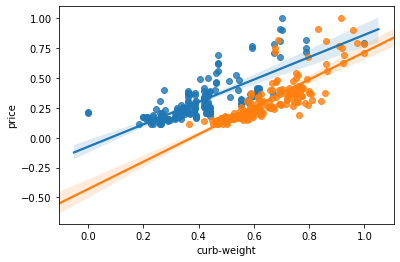

In [74]:
sb.regplot(x = 'horsepower' , y = 'price', data = df)
sb.regplot(x = 'curb-weight' , y = 'price', data = df)


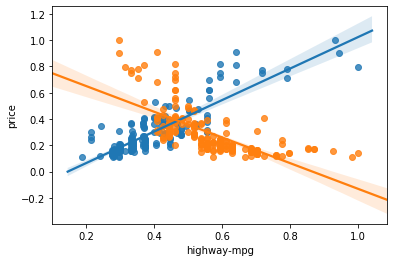

In [75]:
sb.regplot(x = 'engine-size' , y = 'price', data = df)
sb.regplot(x = 'highway-mpg' , y = 'price', data = df)

We see from the above visualizations that 'horsepower','curb-weight','engine-size','highway-mpg' have strong correlation with price

## 4. Building Linear Regression Model Using Ordinary Least Squared

In [56]:
stats = sm.OLS(df['price'],df[['horsepower','curb-weight','engine-size','highway-mpg']])
fit = stats.fit()

Model Summary

In [61]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              876.4
Date:                Tue, 23 Jun 2020   Prob (F-statistic):                   3.03e-124
Time:                        17:19:40   Log-Likelihood:                          226.88
No. Observations:                 201   AIC:                                     -445.8
Df Residuals:                     197   BIC:                                     -432.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
horsepower      0.1615      0.065      2.483      0.014       0.033       0.290
curb-weight     0.1459      0.068      2.142      0.033       0.012       0.280
engine-size     0.7266      0.091      7.955      0.000       0.546       0.907
highway-mpg    -0.2560      0.028     -9.169      0.000      -0.311      -0.201
==============================================================================
Omnibus:                       21.799   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.061
Skew:                           0.577   Prob(JB):                     5.43e-09
Kurtosis:                       4.792   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1. As the predictors have a p-value < 0.05 we consider them significant in predicting the prices of the used cars. This rejects the null hypothesis.
#### 2. R-Squared has a high value that shows that our model has good accuracy to predict the car prices.    

### Predicting the used car prices

In [58]:
yhat = fit.predict(df[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat

0      0.321540
1      0.321540
2      0.411679
3      0.247397
4      0.370985
         ...   
200    0.357658
201    0.403710
202    0.467160
203    0.375891
204    0.375828
Length: 201, dtype: float64

#### Plotting the distribution of predicted prices against actual prices

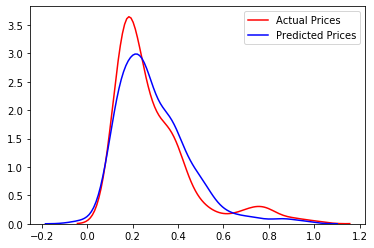

In [59]:
sb.distplot(yhat, hist = False, color = 'b', label = 'Predicted Prices', ax = sb.distplot(df[['price']], hist = False, color = 'r', label='Actual Prices'))